In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
import warnings 
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [2]:
Glass=pd.read_csv("C:\\Users\\shara\\Desktop\\data science total\\assignments\\knn assignment\\glass.csv")

# performing initial analysis ,
### checking is there is any null values r not, checking there is needed for data type transformation 

In [3]:
Glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
Glass.tail()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
209,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [5]:
Glass.shape

(214, 10)

In [6]:
Glass.isnull().sum() # no null values 

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [7]:
Glass.info() # data types  are also correct so there is no need to change the data type


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [8]:
X=Glass.drop(['Type'],axis=1) # dropping Type , cos it is a dependent feature 
y=Glass['Type'] #  Type is assign to  y 

# checking how data distrubated 

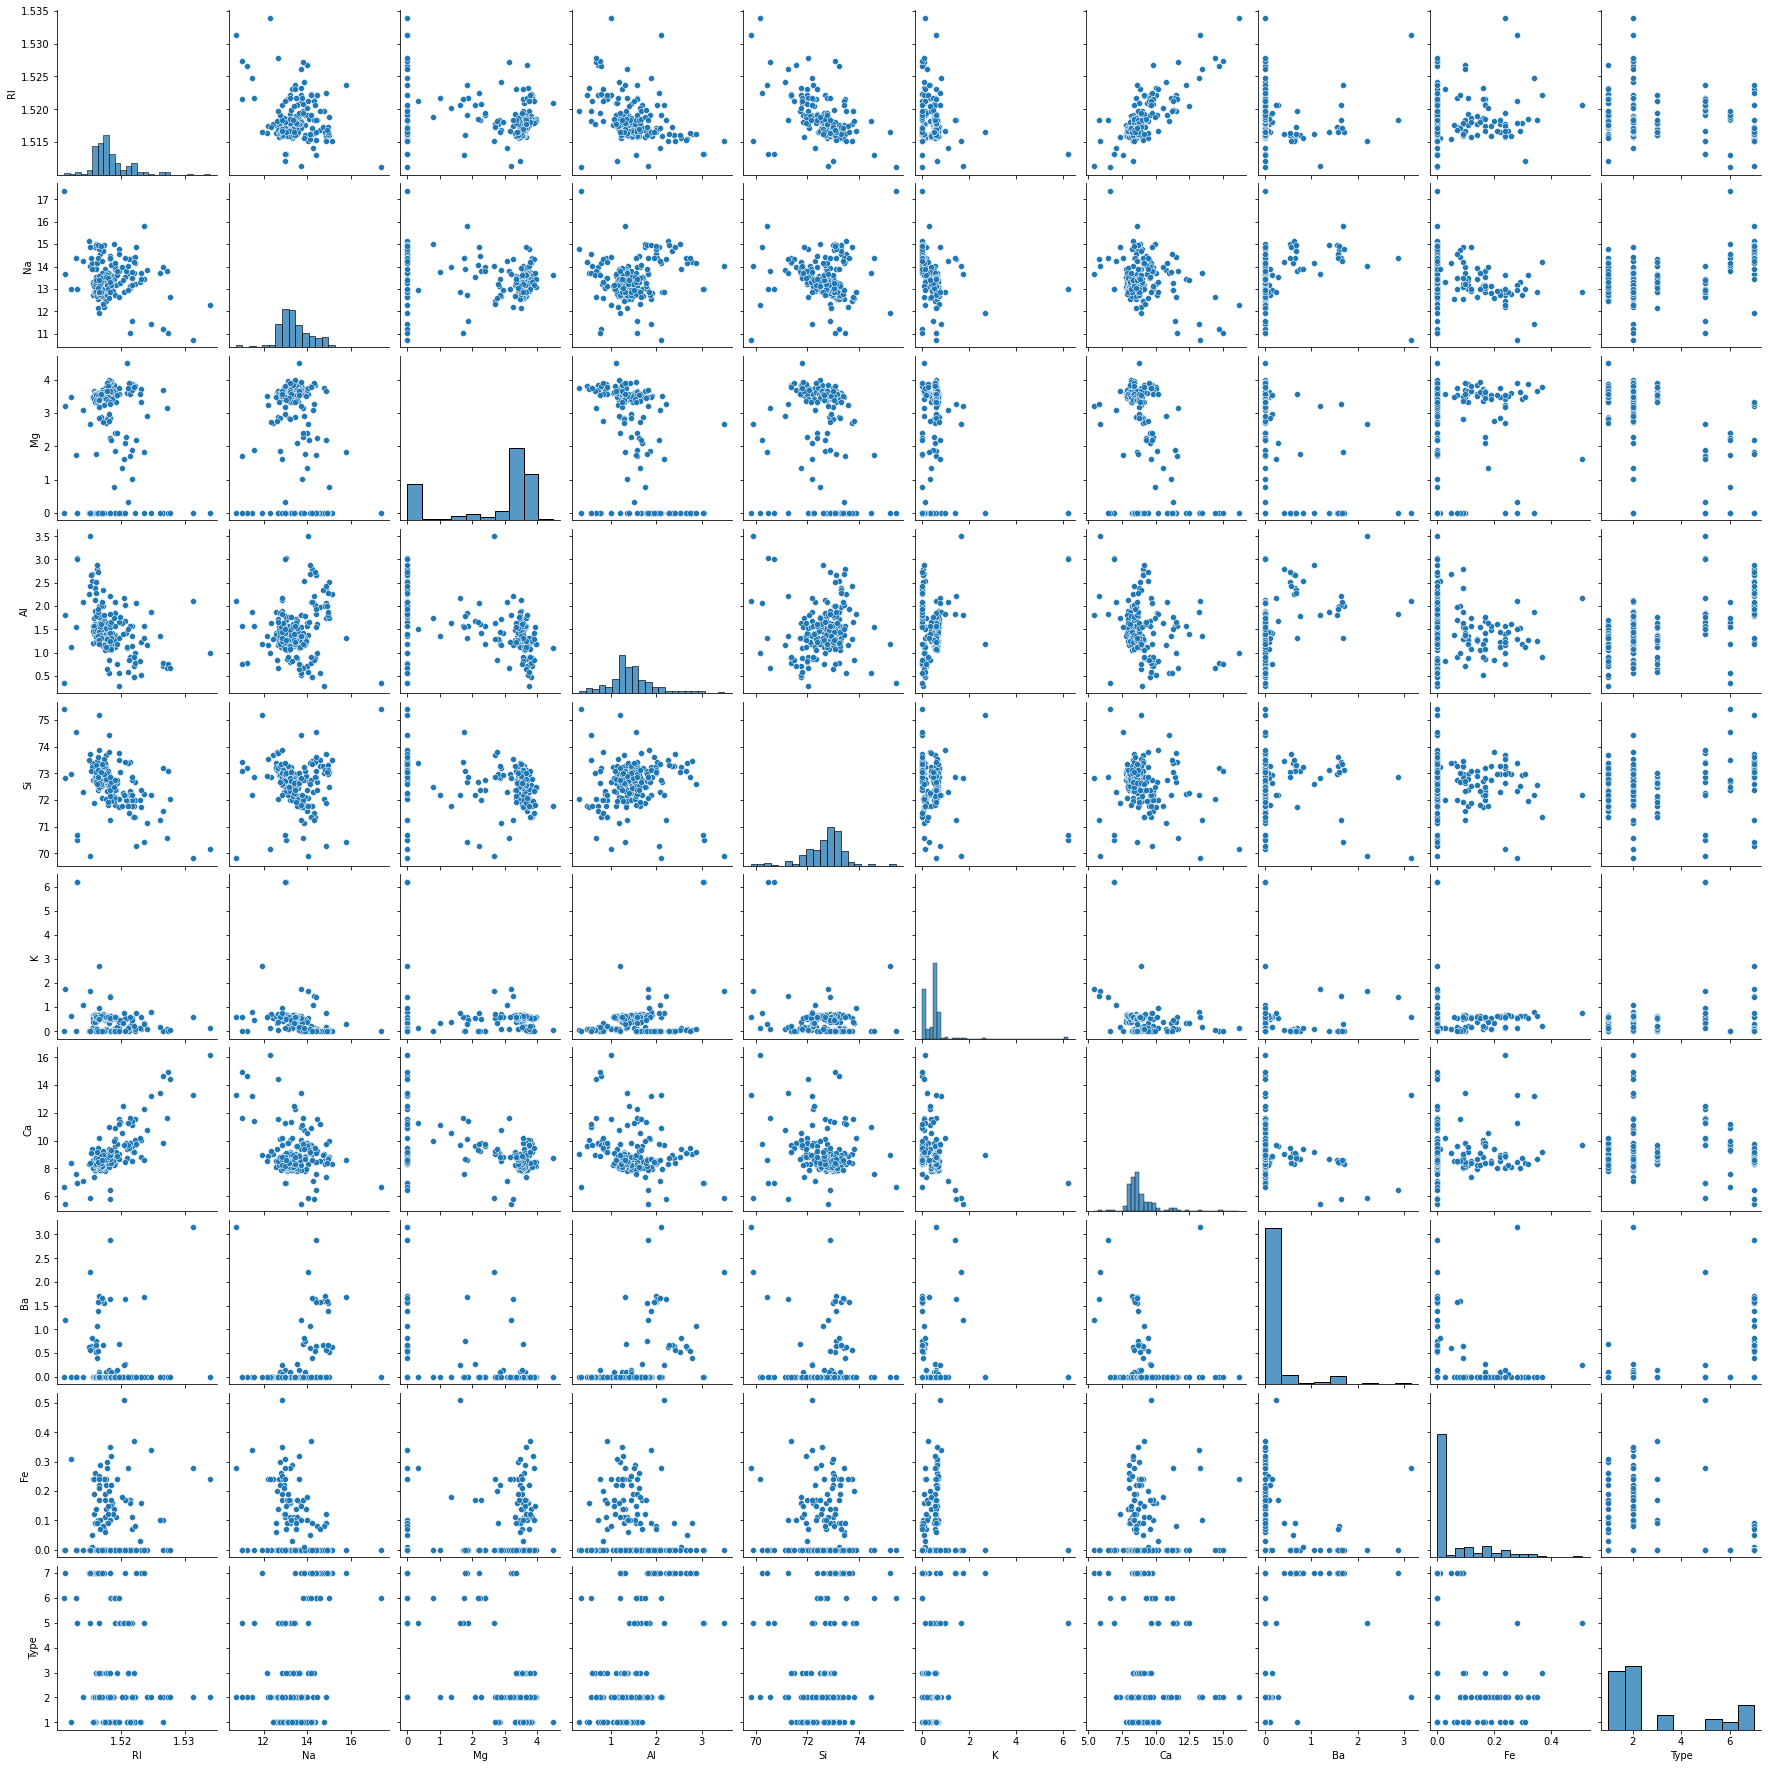

In [9]:
sns.pairplot(Glass)
 # Here i can see the data distrubation

# Model Buliding 

## converting data into train test and split , 20% of data is assign for testing data 

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=12,stratify=y) # data is converted into train test and split 

In [11]:
# checking the shape of train_test_split
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(171, 9) (43, 9) (171,) (43,)


In [12]:
X_train

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
133,1.51800,13.71,3.93,1.54,71.81,0.54,8.21,0.00,0.15
172,1.51321,13.00,0.00,3.02,70.70,6.21,6.93,0.00,0.00
29,1.51784,13.08,3.49,1.28,72.86,0.60,8.49,0.00,0.00
137,1.51711,12.89,3.62,1.57,72.96,0.61,8.11,0.00,0.00
84,1.51409,14.25,3.09,2.08,72.28,1.10,7.08,0.00,0.00
...,...,...,...,...,...,...,...,...,...
205,1.51732,14.95,0.00,1.80,72.99,0.00,8.61,1.55,0.00
24,1.51720,13.38,3.50,1.15,72.85,0.50,8.43,0.00,0.00
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.00,0.00
197,1.51727,14.70,0.00,2.34,73.28,0.00,8.95,0.66,0.00


In [13]:
y_train

133    2
172    5
29     1
137    2
84     2
      ..
205    7
24     1
39     1
197    7
106    2
Name: Type, Length: 171, dtype: int64

In [14]:
X_test,y_test

(          RI     Na    Mg    Al     Si     K     Ca    Ba    Fe
 141  1.51851  13.20  3.63  1.07  72.83  0.57   8.41  0.09  0.17
 199  1.51609  15.01  0.00  2.51  73.05  0.05   8.83  0.53  0.00
 162  1.52211  14.19  3.78  0.91  71.36  0.23   9.14  0.00  0.37
 102  1.51820  12.62  2.76  0.83  73.81  0.35   9.42  0.00  0.20
 113  1.51892  13.46  3.83  1.26  72.55  0.57   8.21  0.00  0.14
 124  1.52177  13.20  3.68  1.15  72.75  0.54   8.52  0.00  0.00
 121  1.51663  12.93  3.54  1.62  72.96  0.64   8.03  0.00  0.21
 88   1.51618  13.01  3.50  1.48  72.89  0.60   8.12  0.00  0.00
 187  1.52315  13.44  3.34  1.23  72.38  0.60   8.83  0.00  0.00
 49   1.51898  13.58  3.35  1.23  72.08  0.59   8.91  0.00  0.00
 125  1.51872  12.93  3.66  1.56  72.51  0.58   8.55  0.00  0.12
 167  1.51969  12.64  0.00  1.65  73.75  0.38  11.53  0.00  0.00
 204  1.51617  14.95  0.00  2.27  73.30  0.00   8.71  0.67  0.00
 200  1.51508  15.15  0.00  2.25  73.50  0.00   8.34  0.63  0.00
 34   1.51783  12.69  3.5

# Model Fitting 

In [15]:
Knn_model= KNeighborsClassifier(n_neighbors=3) # choosing ony odd parameters for k , cos odd parameters is best for k parameters
Knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [16]:
y_pred=Knn_model.predict(X_test)
print("Accuracy:",round(accuracy_score(y_test,y_pred),4))  # accuracy is very less for k=3, 0.3023.Of data points are incorrect classified


Accuracy: 0.6977


In [17]:
Knn_model= KNeighborsClassifier(n_neighbors=5) # choosing ony odd parameters for k , cos odd parameters is best for k parameters
Knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [18]:
y_pred=Knn_model.predict(X_test)
print("Accuracy:",round(accuracy_score(y_test,y_pred),4))  # accuracy is very less for k=5, 0.3723.Of data points are incorrect classified


Accuracy: 0.6279


In [19]:
Knn_model= KNeighborsClassifier(n_neighbors=7) # choosing ony odd parameters for k , cos odd parameters is best for k parameters
Knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [20]:
y_pred=Knn_model.predict(X_test)
print("Accuracy:",round(accuracy_score(y_test,y_pred),4))  # accuracy is very less for k=7, 0.3723.Of data points are incorrect classified


Accuracy: 0.6279


# with out standardization i check what will be accuracy score 


In [21]:
scaler   = StandardScaler()
scaled_X = scaler.fit_transform(X) # perform the standizatation 

In [22]:
X_train,X_test,y_train,y_test=train_test_split(scaled_X,y,test_size=0.20,random_state=12,stratify=y)

In [23]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((171, 9), (171,), (43, 9), (43,))

In [24]:
X_train

array([[-1.20610400e-01,  3.70875159e-01,  8.65488567e-01, ...,
        -5.26095044e-01, -3.52876828e-01,  9.56587946e-01],
       [-1.70159374e+00, -5.00618371e-01, -1.86551055e+00, ...,
        -1.42761494e+00, -3.52876828e-01, -5.86450902e-01],
       [-1.73419864e-01, -4.02421917e-01,  5.59727851e-01, ...,
        -3.28887568e-01, -3.52876828e-01, -5.86450902e-01],
       ...,
       [ 1.24253390e+00,  9.84602997e-01,  7.89048388e-01, ...,
         4.31769840e-01, -3.52876828e-01, -5.86450902e-01],
       [-3.61553581e-01,  1.58605628e+00, -1.86551055e+00, ...,
        -4.90385747e-03,  9.77617652e-01, -5.86450902e-01],
       [ 4.25267336e+00, -3.28694275e+00, -1.86551055e+00, ...,
         3.05885515e+00,  5.99721046e+00,  2.29388828e+00]])

In [25]:
X_test

array([[ 4.77197670e-02, -2.55127236e-01,  6.57015352e-01,
        -7.52670580e-01,  2.31729707e-01,  1.12106515e-01,
        -3.85232561e-01, -1.71445763e-01,  1.16232646e+00],
       [-7.51023380e-01,  1.96656754e+00, -1.86551055e+00,
         2.13830494e+00,  5.16433114e-01, -6.87074327e-01,
        -8.94213472e-02,  7.15550557e-01, -5.86450902e-01],
       [ 1.23593271e+00,  9.60053883e-01,  7.61251959e-01,
        -1.07389008e+00, -1.67060670e+00, -4.10434805e-01,
         1.28915501e-01, -3.52876828e-01,  3.21971159e+00],
       [-5.45985699e-02, -9.67051528e-01,  5.24430284e-02,
        -1.23449983e+00,  1.49995398e+00, -2.26008457e-01,
         3.26122977e-01, -3.52876828e-01,  1.47093423e+00],
       [ 1.83044019e-01,  6.40112399e-02,  7.95997495e-01,
        -3.71222421e-01, -1.30620085e-01,  1.12106515e-01,
        -5.26095044e-01, -3.52876828e-01,  8.53718690e-01],
       [ 1.12371260e+00, -2.55127236e-01,  6.91760888e-01,
        -5.92060829e-01,  1.28201195e-01,  6.599992

# model fitting

In [26]:
Knn_model= KNeighborsClassifier(n_neighbors=3) # choosing ony odd parameters for k , cos odd parameters is best for k parameters
Knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [27]:
y_pred=Knn_model.predict(X_test)
print("Accuracy:",round(accuracy_score(y_test,y_pred),4))  #  after performing standarization accuracy gained for k=3



Accuracy: 0.7674


In [28]:
Knn_model= KNeighborsClassifier(n_neighbors=5) # choosing ony odd parameters for k , cos odd parameters is best for k parameters
Knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [29]:
y_pred=Knn_model.predict(X_test)
print("Accuracy:",round(accuracy_score(y_test,y_pred),4))  #  after performing standarization accuracy gained for k=3



Accuracy: 0.6512


In [30]:
Knn_model= KNeighborsClassifier(n_neighbors=7) # choosing ony odd parameters for k , cos odd parameters is best for k parameters
Knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [31]:
y_pred=Knn_model.predict(X_test)
print("Accuracy:",round(accuracy_score(y_test,y_pred),4))  #  after performing standarization accuracy gained for k=3



Accuracy: 0.6279


## How to pick up optimum no of k?

In [32]:
neighbours = list(range(1,50,2))
cv_scores = []

for i in neighbours:
    knn_model = KNeighborsClassifier(n_neighbors = i)
    cv_score = cross_val_score(estimator = knn_model,X=scaled_X,y=y,cv=10)
    cv_scores.append(cv_score.mean())

In [33]:
cv_scores

[0.6582251082251082,
 0.691125541125541,
 0.6632034632034632,
 0.6257575757575757,
 0.620995670995671,
 0.6162337662337661,
 0.6023809523809524,
 0.5928571428571429,
 0.5837662337662338,
 0.5932900432900434,
 0.5844155844155845,
 0.5655844155844155,
 0.5796536796536796,
 0.583982683982684,
 0.5794372294372295,
 0.5701298701298702,
 0.5608225108225107,
 0.5885281385281386,
 0.5837662337662337,
 0.579004329004329,
 0.5841991341991342,
 0.5837662337662336,
 0.5837662337662338,
 0.5701298701298702,
 0.5517316017316017]

In [34]:
neighbours[cv_scores.index(max(cv_scores))]

3

### <b> from all the above models i can tell k=3 is best model </b> 

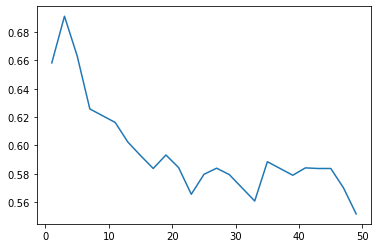

In [35]:
plt.plot(neighbours,cv_scores)
plt.show()

# 2nd assignment on zoo problem statment

In [36]:
Zoo=pd.read_csv("C:\\Users\\shara\\Desktop\\data science total\\assignments\\knn assignment\\Zoo.csv")

# performing initial analysis ,
### checking is there is any null values r not, checking there is needed for data type transformation 

In [37]:
Zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [38]:
Zoo.tail()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7
100,wren,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0,2


In [39]:
Zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [40]:
Zoo.isna().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

# model deployment 

In [41]:
X=Zoo.iloc[:,1:17]
y=Zoo.iloc[:,17]

In [42]:
X

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [43]:
y

0      1
1      1
2      4
3      1
4      1
      ..
96     1
97     6
98     1
99     7
100    2
Name: type, Length: 101, dtype: int64

In [44]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=12,stratify=y)

In [45]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((80, 16), (80,), (21, 16), (21,))

# model fitting

In [46]:
knn_model = KNeighborsClassifier(n_neighbors=3)# choosing ony odd parameters for k , cos odd parameters is best for k parameters

knn_model.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=3)

In [47]:
y_pred=knn_model.predict(X_test)
print("Accuracy score: ", round(accuracy_score(y_test,y_pred),4)) # accuracy is best with 95% accuracy 

Accuracy score:  0.9524


In [48]:
Knn_model= KNeighborsClassifier(n_neighbors=5) # choosing ony odd parameters for k , cos odd parameters is best for k parameters
Knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [52]:
y_pred=knn_model.predict(X_test)
print("Accuracy score: ", round(accuracy_score(y_test,y_pred),4)) # accuracy is best with 95% accuracy 

Accuracy score:  0.9524


# choosing optimum number


In [53]:
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
neighbours = list(range(1,50,2))
cv_scores = []

for i in neighbours:
    #print(i)
    knn_model = KNeighborsClassifier(n_neighbors = i)
    cv_score = cross_val_score(estimator = knn_model,X=X,y=y,cv=10)
    #print(i,'-',cv_score.mean())
    cv_scores.append(cv_score.mean())

In [54]:
cv_scores

[0.9800000000000001,
 0.95,
 0.8809090909090909,
 0.8418181818181818,
 0.7818181818181819,
 0.7818181818181819,
 0.7818181818181819,
 0.7818181818181819,
 0.7818181818181819,
 0.7818181818181819,
 0.7818181818181819,
 0.7718181818181818,
 0.7218181818181818,
 0.7027272727272726,
 0.7027272727272726,
 0.7027272727272726,
 0.6436363636363637,
 0.5936363636363635,
 0.5736363636363636,
 0.5736363636363636,
 0.5736363636363636,
 0.5736363636363636,
 0.5536363636363636,
 0.5436363636363637,
 0.5345454545454545]

In [55]:
neighbours[cv_scores.index(max(cv_scores))]

1

# as per saw above observations i can see the first data point is best 

In [57]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [60]:
y_pred=knn_model.predict(X_test)
print("Accuracy score: ", round(accuracy_score(y_test,y_pred),4))

Accuracy score:  1.0


## Vizualizing the K neighbours wrt CV


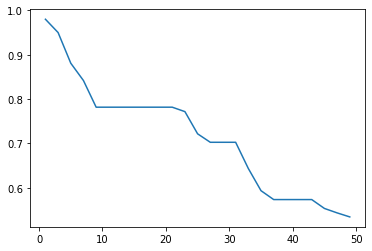

In [61]:

plt.plot(neighbours,cv_scores)
plt.show()

# i have choosen 3 parameters one k=1,k=3,k=5
## <b> in that i can say k=1 is the best model <b>